# Plots

## Supervised Learning Model

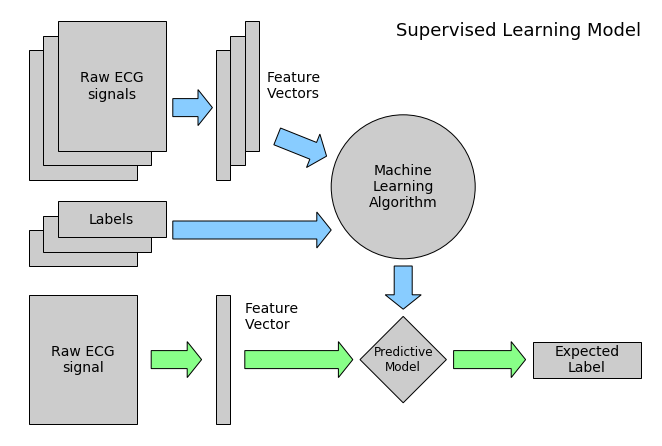

In [10]:
%matplotlib inline
import numpy as np
import pylab as pl
from matplotlib.patches import Circle, Rectangle, Polygon, Arrow, FancyArrow

def create_base(box_bg = '#CCCCCC',
                arrow1 = '#88CCFF',
                arrow2 = '#88FF88',
                supervised=True):
    fig = pl.figure(figsize=(9, 6), facecolor='w')
    ax = pl.axes((0, 0, 1, 1),
                 xticks=[], yticks=[], frameon=False)
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 6)

    patches = [Rectangle((0.3, 3.6), 1.5, 1.8, zorder=1, fc=box_bg),
               Rectangle((0.5, 3.8), 1.5, 1.8, zorder=2, fc=box_bg),
               Rectangle((0.7, 4.0), 1.5, 1.8, zorder=3, fc=box_bg),
               
               Rectangle((2.9, 3.6), 0.2, 1.8, fc=box_bg),
               Rectangle((3.1, 3.8), 0.2, 1.8, fc=box_bg),
               Rectangle((3.3, 4.0), 0.2, 1.8, fc=box_bg),

               
               
               Rectangle((0.3, 0.2), 1.5, 1.8, fc=box_bg),
               
               Rectangle((2.9, 0.2), 0.2, 1.8, fc=box_bg),
               
               Circle((5.5, 3.5), 1.0, fc=box_bg),
               
               Polygon([[5.5, 1.7],
                        [6.1, 1.1],
                        [5.5, 0.5],
                        [4.9, 1.1]], fc=box_bg),
               FancyArrow(2.3, 4.6, 0.35, 0, fc=arrow1,
                          width=0.25, head_width=0.5, head_length=0.2),

               FancyArrow(3.75, 4.2, 0.5, -0.2, fc=arrow1,
                          width=0.25, head_width=0.5, head_length=0.2),

               FancyArrow(5.5, 2.4, 0, -0.4, fc=arrow1,
                          width=0.25, head_width=0.5, head_length=0.2),

               FancyArrow(2.0, 1.1, 0.5, 0, fc=arrow2,
                          width=0.25, head_width=0.5, head_length=0.2),

               FancyArrow(3.3, 1.1, 1.3, 0, fc=arrow2,
                          width=0.25, head_width=0.5, head_length=0.2),

               FancyArrow(6.2, 1.1, 0.8, 0, fc=arrow2,
                          width=0.25, head_width=0.5, head_length=0.2)]

    if supervised:
        patches += [Rectangle((0.3, 2.4), 1.5, 0.5, zorder=1, fc=box_bg),
                    Rectangle((0.5, 2.6), 1.5, 0.5, zorder=2, fc=box_bg),
                    Rectangle((0.7, 2.8), 1.5, 0.5, zorder=3, fc=box_bg),
                    FancyArrow(2.3, 2.9, 2.0, 0, fc=arrow1,
                               width=0.25, head_width=0.5, head_length=0.2),
                    Rectangle((7.3, 0.85), 1.5, 0.5, fc=box_bg)]
    else:
        patches += [Rectangle((7.3, 0.2), 1.5, 1.8, fc=box_bg)]
    
    for p in patches:
        ax.add_patch(p)
        
    pl.text(1.45, 4.9, "Raw ECG\nsignals",
            ha='center', va='center', fontsize=14)
    
    pl.text(3.6, 4.9, "Feature\nVectors", 
            ha='left', va='center', fontsize=14)
      
        
    pl.text(5.5, 3.5, "Machine\nLearning\nAlgorithm",
            ha='center', va='center', fontsize=14)
    
    pl.text(1.05, 1.1, "Raw ECG\nsignal",
            ha='center', va='center', fontsize=14)
    
    pl.text(3.3, 1.7, "Feature\nVector", 
            ha='left', va='center', fontsize=14)
    
    pl.text(5.5, 1.1, "Predictive\nModel", 
            ha='center', va='center', fontsize=12)


    pl.text(1.45, 3.05, "Labels",
            ha='center', va='center', fontsize=14)

    pl.text(8.05, 1.1, "Expected\nLabel",
            ha='center', va='center', fontsize=14)
    pl.text(8.8, 5.8, "Supervised Learning Model",
            ha='right', va='top', fontsize=18)

    pl.savefig('/notebooks/data/supervised_learning_model.png',dpi=1200)
        
        


create_base()
#plot_supervised(False)
#plot_supervised(True)
#plot_unsupervised()
#pl.show()

In [26]:
pl.savefig('/notebooks/data/supervised_learning_model.png')

## Confusion matrix

Confusion matrix, without normalization
[[ 601   27  124    6]
 [   8 4754  285   29]
 [  64  558 1773   20]
 [  11   74   40  154]]
Normalized confusion matrix
[[0.79 0.04 0.16 0.01]
 [0.   0.94 0.06 0.01]
 [0.03 0.23 0.73 0.01]
 [0.04 0.27 0.14 0.55]]


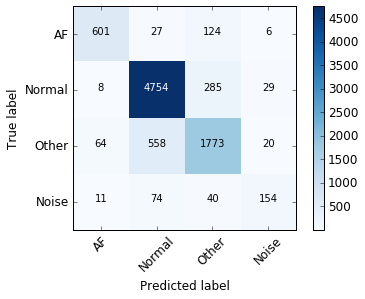

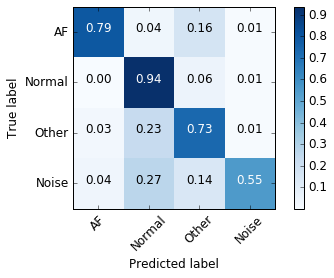

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools


pred_5xCV=pd.read_csv('y_5xCV_rf.txt',header=None)
pred_5xCV=pred_5xCV[1]
#print(pred_5xCV)

ref_v3=pd.read_csv('/notebooks/References/REF_V3.csv',header=None)
ref_v3=ref_v3[1]

class_names=['AF', 'Normal', 'Other', 'Noise'];

FONT_SIZE=12


#print(ref_v3)


#pred_aftdb=pd.read_csv('answers_aftdb.txt',header=None)
#pred_aftdb_binary=pd.read_csv('answers_aftdb_binary.txt',header=None)
#ref_aftdb=pd.read_csv('reference_aftdb.txt',header=None)
#pred_aftdb=pred_aftdb[1]
#pred_aftdb_binary=pred_aftdb_binary[1]
#ref_aftdb=ref_aftdb[1]

#class_names_binary=['A', 'Not A'];


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(ref_v3, pred_5xCV)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix 5-fold CV')


rc={'axes.labelsize': FONT_SIZE, 'font.size': FONT_SIZE, 'legend.fontsize': FONT_SIZE, 'axes.titlesize': FONT_SIZE,'xtick.labelsize': FONT_SIZE, 'ytick.labelsize': FONT_SIZE}
plt.rcParams.update(**rc)
plt.savefig('conf_matrix_5xCV.png',dpi=300)


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix 5-fold CV')
plt.tight_layout()


plt.savefig('conf_matrix_norm_5xCV_rf.png',dpi=1200)



#cnf_matrix = confusion_matrix(ref_aftdb, pred_aftdb_binary)
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names_binary,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names_binary, normalize=True,
#                      title='AFTDB Normalized confusion matrix')




plt.show()
